In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir('../../Beergression_Data_and_misc/Data/')

# LASSO Model

In [4]:
df = pd.read_pickle('Cleaned_Modeled_Data')

In [5]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [7]:
param_grid = {
    'alpha': [.00036, .00038, .0004, .00042, .00044, .00046,],
    'max_iter': [100, 90, 80, 70, 60, 50, 40]
}
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

grid.best_params_

{'alpha': 0.00044, 'max_iter': 60}

In [8]:
lasso_model = Lasso(alpha = .00044, max_iter = 60)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.00044, copy_X=True, fit_intercept=True, max_iter=60,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
list(zip(list(X.columns), lasso_model.coef_))

[('Eatery', -0.05619690450642595),
 ('Lam_Total_Beer_Ratings', -0.07252779783801558),
 ('Lam_Total_Beer_Reviews', -0.055860207993866574),
 ('Lam_Num_Brewery_Ratings', 0.006196654178692287),
 ('Lam_Num_Brewery_Ratings', 1.3583479094108768e-18),
 ('Num_Beers', 0.023431197088080818),
 ('Max_Beer_Score', 0.08747277539543269),
 ('Max_Mean_Beer_Score', 0.03885291314032677),
 ('Mean_Beer_Score', 0.01930481033288763),
 ('Lam_Brew_Rats_Revs', 0.0820887801797685),
 ('Lam_Beer_Rats_Revs', 3.712817619056395e-18),
 ('Max_Times_Mean_Beer_Score', 0.0005784424657490673),
 ('Count_IPA_Pale_Ale', 0.008776572851460081),
 ('Wild_Sour', 0.01991777579112055)]

In [10]:
lm_train = lasso_model.score(X_train,y_train)
lm_val = lasso_model.score(X_val,y_val)

# Print out the R^2 for the model against the full dataset
print(lm_train)
print(lm_val)
print(1 - (1-lm_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lm_val)*(len(y_val)-1)/(len(y_val)-X_test.shape[1]-1))

0.22027621703670552
0.20918049601005784
0.21579688467663727
0.1953928583315283


In [11]:
predictions = lasso_model.predict(X_test)

In [12]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.2993352139648233


In [13]:
y_test.std()

0.33829027451012084

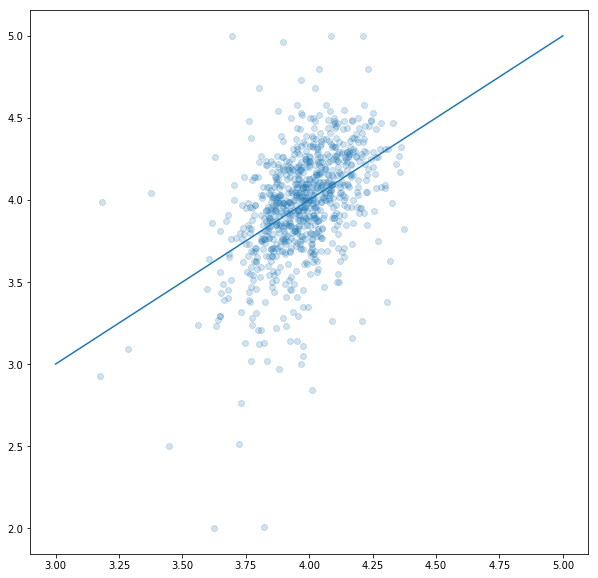

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

# Ridge Test

In [15]:
df = pd.read_pickle('Cleaned_Modeled_Data')

In [16]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [18]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [20]:
param_grid = {
    'alpha': [32,34,36,38,40]
}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

grid.best_params_

{'alpha': 38}

In [21]:
lr_model_ridge = Ridge(alpha = 38)
lr_model_ridge.fit(X_train, y_train)

list(zip(X.columns, lr_model_ridge.coef_))

[('Eatery', -0.05588664560603177),
 ('Lam_Total_Beer_Ratings', -0.02032639550427735),
 ('Lam_Total_Beer_Reviews', -0.04895904169532558),
 ('Lam_Num_Brewery_Ratings', -0.020326395504277995),
 ('Lam_Num_Brewery_Ratings', -0.02032639550427783),
 ('Num_Beers', 0.021370962744271547),
 ('Max_Beer_Score', 0.07888513029366173),
 ('Max_Mean_Beer_Score', 0.036582458098680964),
 ('Mean_Beer_Score', 0.00325595808083826),
 ('Lam_Brew_Rats_Revs', 0.035477854117758736),
 ('Lam_Beer_Rats_Revs', 0.035477854117758736),
 ('Max_Times_Mean_Beer_Score', 0.020553997421492377),
 ('Count_IPA_Pale_Ale', 0.01109673381009071),
 ('Wild_Sour', 0.020343248098199616)]

In [22]:
ridge_train = lr_model_ridge.score(X_train,y_train)
ridge_val = lr_model_ridge.score(X_val,y_val)

print(ridge_train)
print(ridge_val)
print(1 - (1-ridge_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-ridge_val)*(len(y_val)-1)/(len(y_val)-X_test.shape[1]-1))

0.22006639054732569
0.21233827812417627
0.2155858527827227
0.1986056951773998


In [23]:
predictions = lr_model_ridge.predict(X_test)

In [24]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.2993560014034724


In [25]:
y_test.std()

0.33829027451012084

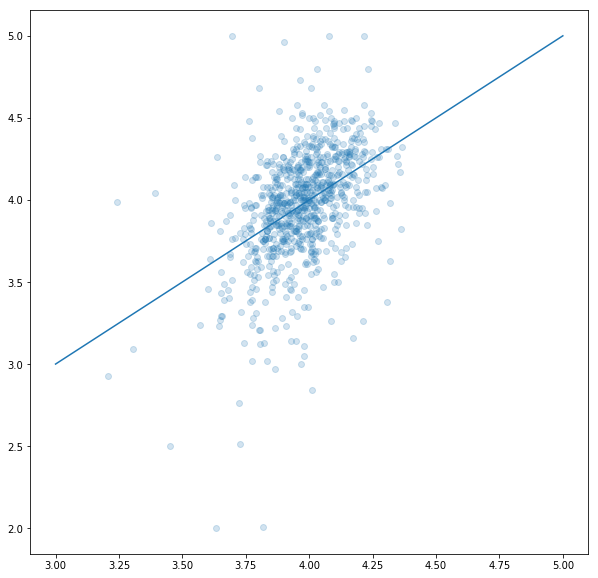

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

# LASSO with IQR

In [27]:
df = pd.read_pickle('All_Data')

In [28]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [29]:
df.dropna(inplace=True)

In [30]:
Q1 = df.Num_Brewery_Ratings.quantile(0.25)
Q3 = df.Num_Brewery_Ratings.quantile(0.75)

In [31]:
df = df[(df.Num_Brewery_Ratings >= Q1) & (df.Num_Brewery_Ratings <= Q3)]

In [32]:
lamb1=stats.boxcox_normmax(df.Total_Beer_Ratings, brack=(-1.9, 1.9)) 
lamb2=stats.boxcox_normmax(df.Total_Beer_Reviews, brack=(-1.9, 1.9))
lamb3=stats.boxcox_normmax(df.Num_Brewery_Ratings, brack=(-1.9, 1.9))
lamb4=stats.boxcox_normmax(df.Num_Brewery_Reviews, brack=(-1.9, 1.9))

In [33]:
df['Lam_Total_Beer_Ratings'] = (np.power(df.Total_Beer_Ratings,lamb1)-1)/lamb1
df['Lam_Total_Beer_Reviews'] = (np.power(df.Total_Beer_Reviews,lamb2)-1)/lamb2
df['Lam_Num_Brewery_Ratings'] = (np.power(df.Num_Brewery_Ratings,lamb3)-1)/lamb3
df['Lam_Num_Brewery_Reviews'] = (np.power(df.Num_Brewery_Reviews,lamb4)-1)/lamb4

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Lam_Brew_Rats_Revs'] = df['Lam_Num_Brewery_Ratings'] * df['Lam_Num_Brewery_Reviews']
df['Lam_Beer_Rats_Revs'] = df['Lam_Total_Beer_Ratings'] * df['Lam_Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [34]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [35]:
param_grid = {
    'alpha': [.00042, .0004, .00038, .00036, .00034],
    'max_iter': [60, 50, 40, 30, 20, 10, 5, 1]
}
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

grid.best_params_

{'alpha': 0.00038, 'max_iter': 5}

In [36]:
# Create an empty model
lasso = Lasso(alpha = 0.00038, max_iter = 5)

# Fit the model to the full dataset
lasso.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(1 - (1-lasso.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lasso.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.22678901788618908
0.23032755260101345
0.2197138847165202
0.21588329755599234


In [37]:
predictions = lasso.predict(X_test)

In [38]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.2592792891138137


In [39]:
y_test.std()

0.2957334089807192

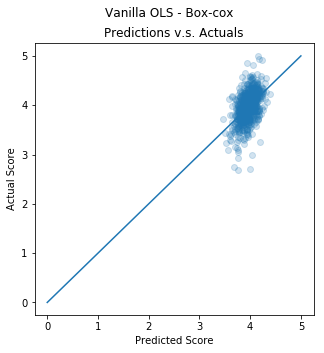

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([0,5],[0,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - Box-cox')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS_Box_cox')

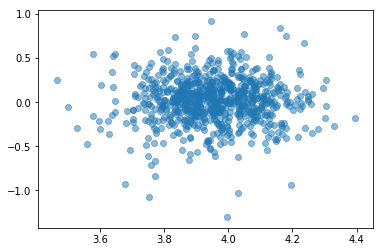

In [41]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5)


# Ridge with IQR

In [42]:
df = pd.read_pickle('All_Data')

In [43]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [44]:
df.dropna(inplace=True)

In [45]:
df = df[df.Total_Beer_Reviews < 300]

In [46]:
Q1 = df.Num_Brewery_Ratings.quantile(0.25)
Q3 = df.Num_Brewery_Ratings.quantile(0.75)

In [47]:
df = df[(df.Num_Brewery_Ratings >= Q1) & (df.Num_Brewery_Ratings <= Q3)]

In [48]:
lamb1=stats.boxcox_normmax(df.Total_Beer_Ratings, brack=(-1.9, 1.9)) 
lamb2=stats.boxcox_normmax(df.Total_Beer_Reviews, brack=(-1.9, 1.9))
lamb3=stats.boxcox_normmax(df.Num_Brewery_Ratings, brack=(-1.9, 1.9))
lamb4=stats.boxcox_normmax(df.Num_Brewery_Reviews, brack=(-1.9, 1.9))

In [49]:
df['Lam_Total_Beer_Ratings'] = (np.power(df.Total_Beer_Ratings,lamb1)-1)/lamb1
df['Lam_Total_Beer_Reviews'] = (np.power(df.Total_Beer_Reviews,lamb2)-1)/lamb2
df['Lam_Num_Brewery_Ratings'] = (np.power(df.Num_Brewery_Ratings,lamb3)-1)/lamb3
df['Lam_Num_Brewery_Reviews'] = (np.power(df.Num_Brewery_Reviews,lamb4)-1)/lamb4

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Lam_Brew_Rats_Revs'] = df['Lam_Num_Brewery_Ratings'] * df['Lam_Num_Brewery_Reviews']
df['Lam_Beer_Rats_Revs'] = df['Lam_Total_Beer_Ratings'] * df['Lam_Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [50]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [51]:
param_grid = {
    'alpha': [28, 27, 26, 25, 24, 23, 22],
}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

grid.best_params_

{'alpha': 24}

In [52]:
lr_model_ridge = Ridge(alpha = 24)
lr_model_ridge.fit(X_train, y_train)

list(zip(X.columns, lr_model_ridge.coef_))

[('Eatery', -0.1240366754370002),
 ('Lam_Total_Beer_Ratings', 0.0039654248160979335),
 ('Lam_Total_Beer_Reviews', 0.0018135638197696472),
 ('Lam_Num_Brewery_Ratings', 0.0039654248160979145),
 ('Lam_Num_Brewery_Ratings', 0.003965424816098003),
 ('Num_Beers', 0.0031701492101740116),
 ('Max_Beer_Score', 0.07627392905383396),
 ('Max_Mean_Beer_Score', 0.07069927752896311),
 ('Mean_Beer_Score', -0.062291180115734035),
 ('Lam_Brew_Rats_Revs', -0.0015836459180824222),
 ('Lam_Beer_Rats_Revs', -0.0015836459180824378),
 ('Max_Times_Mean_Beer_Score', 0.005926428985898944),
 ('Count_IPA_Pale_Ale', 0.0001475677893268235),
 ('Wild_Sour', 0.0022878723657024243)]

In [53]:
ridge_train = lr_model_ridge.score(X_train,y_train)
ridge_val = lr_model_ridge.score(X_val,y_val)

print(ridge_train)
print(ridge_val)
print(1 - (1-ridge_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-ridge_val)*(len(y_val)-1)/(len(y_val)-X_test.shape[1]-1))

0.21539940878440067
0.24279062386307806
0.20644716079987058
0.21628829569828578


In [54]:
predictions = lr_model_ridge.predict(X_test)

In [55]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.2659168982834653


In [56]:
y_test.std()

0.29399564695481495

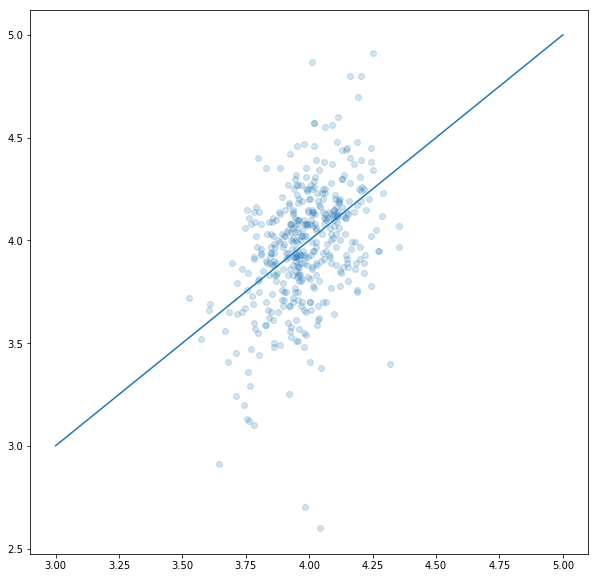

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])